# CARDIO GOOD FITNESS PROJECT
### Dataset CardioGoodFitness.csv

    Product - the model no. of the treadmill
    Age - in no of years, of the customer
    Gender - of the customer
    Education - in no. of years, of the customer
    Marital Status - of the customer
    Usage - Avg. # times the customer wants to use the treadmill every week
    Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
    Income - of the customer
    Miles- expected to run   

# Objective:
Preliminary data analysis: Explore and extract information from the dataset provided to identify differences between the customers of each product they sell.  This should enable Good Cardio Fitness to start the process of building a customer profile for each model they sell.

In [164]:
##Import appropriate libaries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pdata = pd.read_csv('CardioGoodFitness.csv')
import warnings as warningslt
import seaborn as sns

warnings.filterwarnings('ignore')

## Data Review

In [165]:
##View a sample of the data - first five rows
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [166]:
##View a total number of records and columns
data.shape

(180, 9)

In [167]:
##View statistical information about the dataset
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [168]:
#Confirm no null values
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [169]:
#Review categorical variables
data.describe(exclude='number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [170]:
##View datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are 3 products in this dataset.
I have 9 columns, 6 columns contain interger values and 3 contain categorical data.  I will change the 3 object data
type columns to category datatypes.  There are no null values in the data.

# Data Preprocessing

In [171]:
#Change Product, Gender and Marital Status to category datatype
data['Product'] = data.Product.astype('category')
data['Gender'] = data.Gender.astype('category')
data['MaritalStatus'] = data.MaritalStatus.astype('category')

In [172]:
#Confirm Changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


# Univarariate Analysis

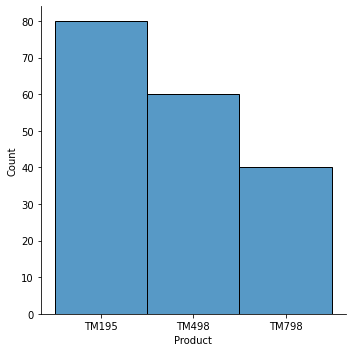

In [173]:
#Visualize the different number of products that make up the dataset
sns.displot(x='Product',data=data)
plt.show()

I have three product types with TM195 being the most frequently occuring product in the dataset

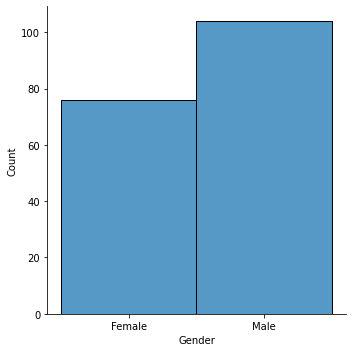

In [174]:
#Visualize the breakout between men and women
sns.displot(x='Gender',data=data)

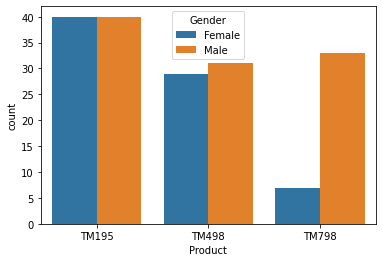

In [175]:
#Visualize the product dispersion between male and female
sns.countplot(x='Product',data=data,hue=(data['Gender']))
plt.show()
# We can see the more men that women are purchasing treadmills with the most significant difference related product TM798

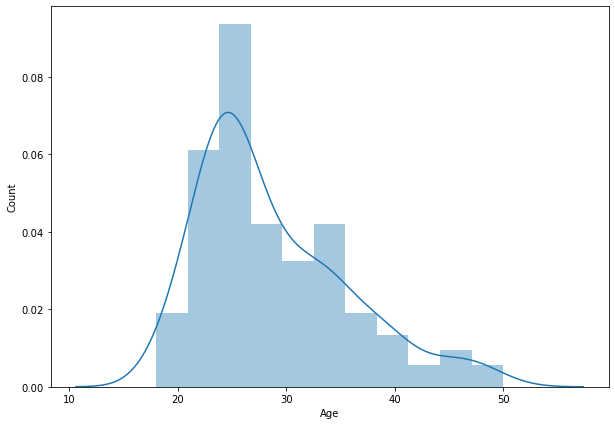

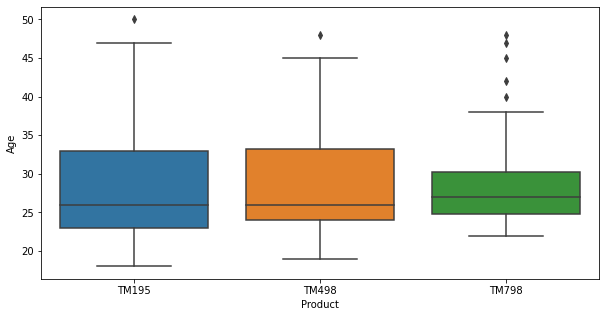

In [220]:
#Visualize the distribution by Age
plt.figure(figsize=(10,7))
ax = sns.distplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.figure(figsize=(10,5))           
sns.boxplot(x='Product',y='Age',data=data)
plt.show()
#The majority of customers are between 20 and 30 years old.

<AxesSubplot:xlabel='Product', ylabel='count'>

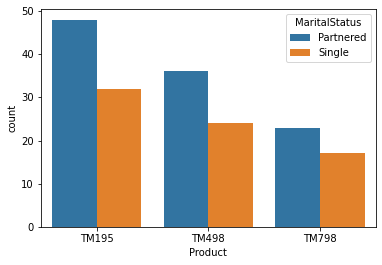

In [187]:
#Visualize the product dispersion based on marital status
sns.countplot(x='Product', data=data, hue=(data['MaritalStatus']))

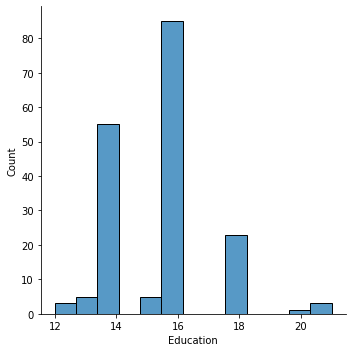

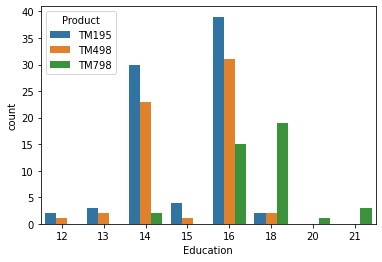

In [188]:
#Visualize the Education variable across all products and by product
sns.displot(x='Education',data=data)
plt.show()
sns.countplot(x='Education', data=data, hue='Product')
plt.show()


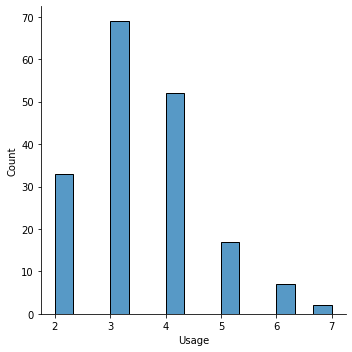

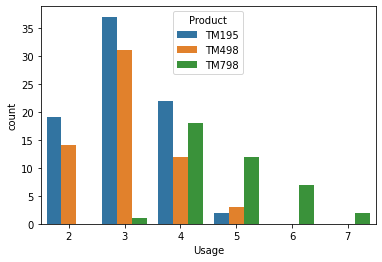

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64

In [189]:
#Visualize the Usage variable overall and by product, find the mean usage for each product
sns.displot(x="Usage", data=data)
plt.show()
sns.countplot(x='Usage',data=data, hue='Product')
plt.show()
data.groupby(by = ['Product'])['Usage'].mean()
## The majority of customers plan to use the treadmill 3 to 4 times per week.

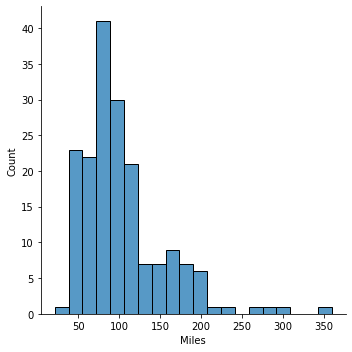

<function matplotlib.pyplot.show(close=None, block=None)>

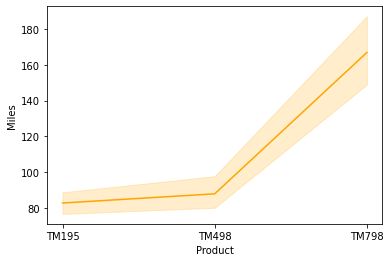

In [191]:
#Look at the Miles intended to run variable
sns.displot(x='Miles',data=data)
plt.show()
sns.lineplot(x='Product', y='Miles', data=data, color ='orange')
plt.show
#Data shows only a slight difference between the number of Miles for customers who purchased the TM195 and TM498 with 
#a significant increase for those who purchased the TM798.

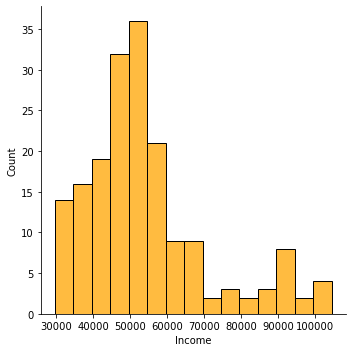

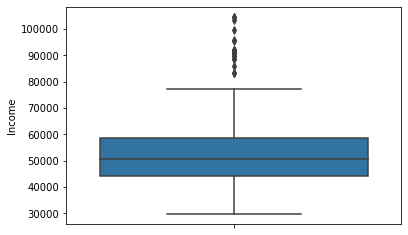

In [192]:
sns.displot(data['Income'],color='orange')
plt.show()
sns.boxplot(y='Income',data=data)
plt.show()

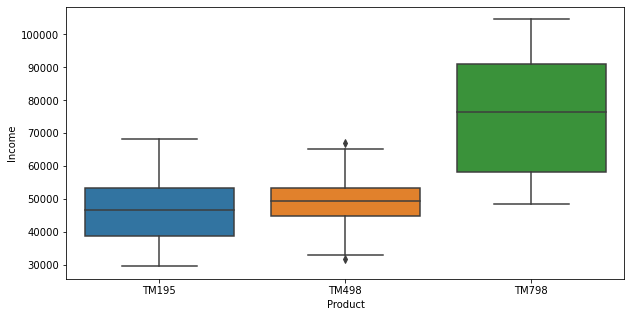

In [194]:
plt.figure(figsize=(10,5))           
sns.boxplot(x='Product',y='Income',data=data)
plt.show()

Looks like people with a higher income lean toward the TM798. People with a lower income tend to select the TM195. This is likely indicative of the cost, but that information was not provided.  

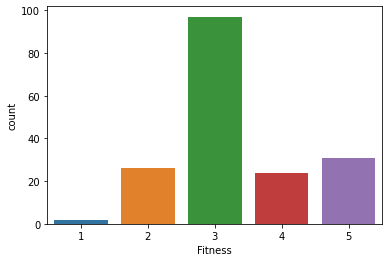

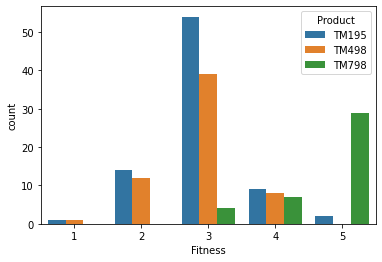

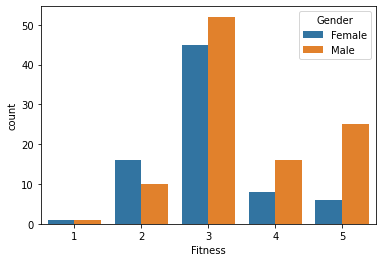

In [218]:
#Visualize the Fitness Variable overall and by Product and by Gender
sns.countplot(x='Fitness',data=data)
plt.show()
sns.countplot(x='Fitness',data=data, hue='Product')
plt.show()
sns.countplot(x='Fitness',data=data, hue='Gender')
plt.show()


People who purchase the TM798 tend to rate themselves are more fit than those purchasing the other two models.  Also interesting, no one who rated themselves as very fit purchased the TM498.

# Correlation Analysis

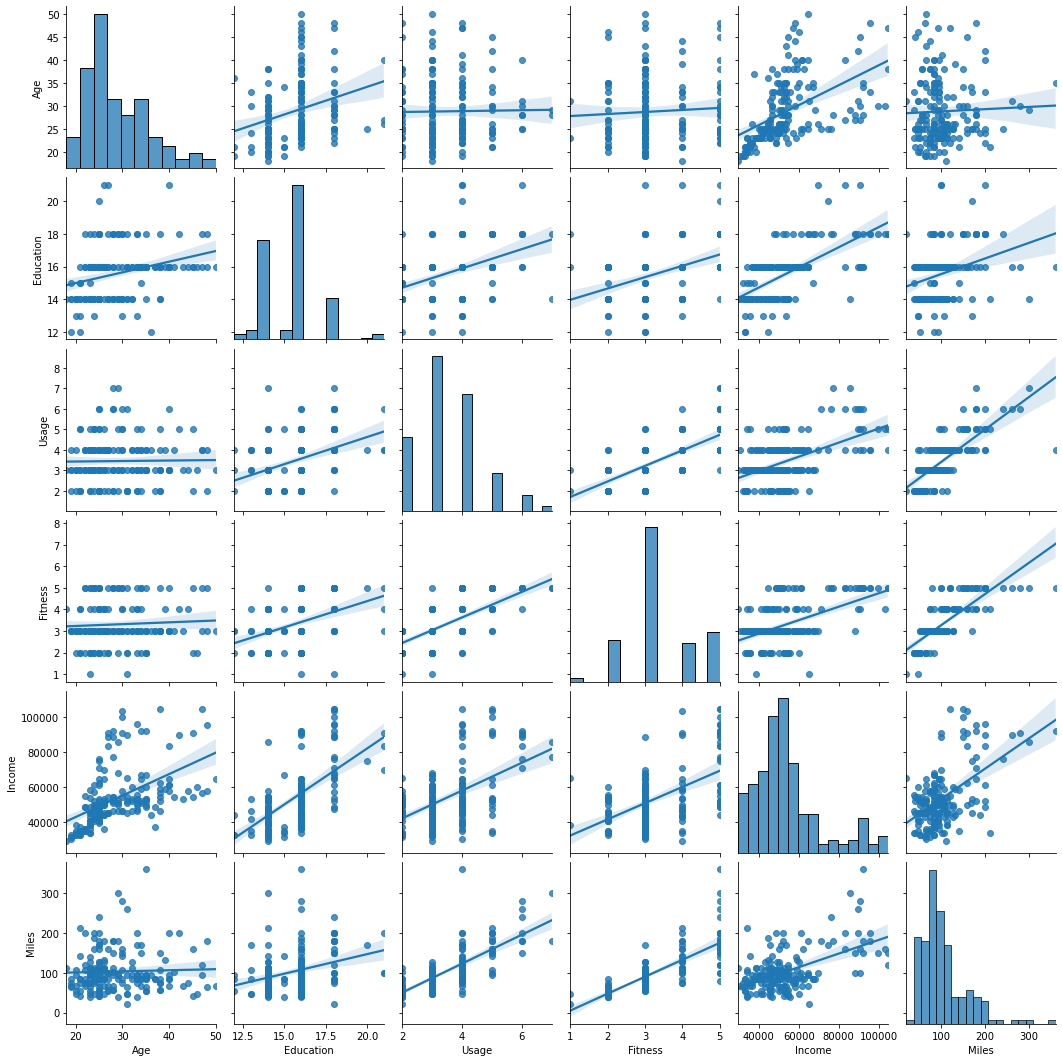

In [196]:
##Look for correlations between the numeric variables
sns.pairplot(data, kind="reg")
plt.show()


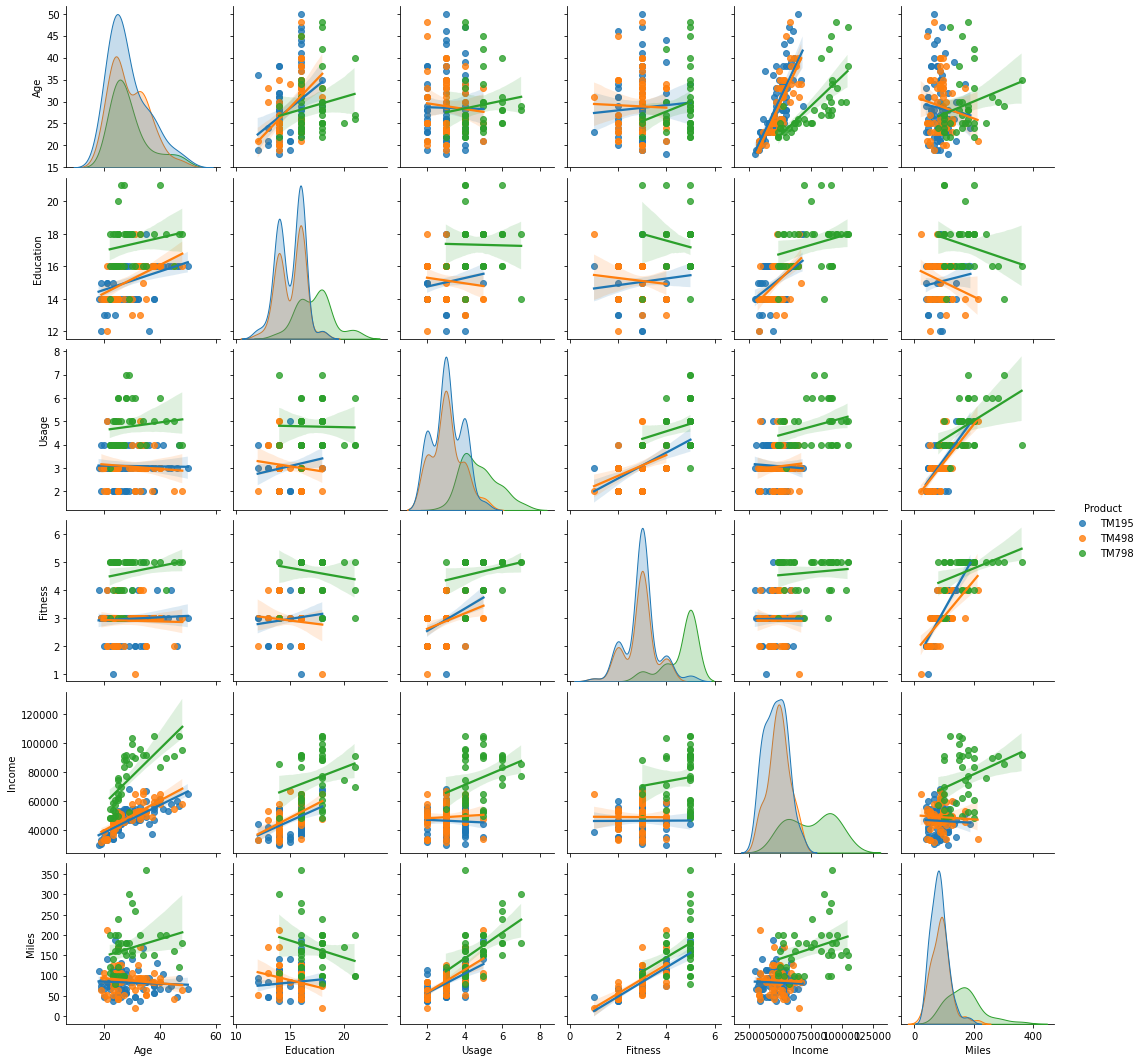

In [197]:
##Look for correlations between the variables including a breakout of the model number
sns.pairplot(data, kind="reg", hue="Product")
plt.show()

Correlation analysis indicates relationships between Fitness and Miles, Usage and Miles, Usage and Fitness, Income and Education, Income and Fitness, Income and Usage and Income and Miles.  When broken out by Product we can specifally see that customers who purchased TM798 had a strong correlation between Income and Usage, Income and Age, Fitness and Miles and Usage and Miles.

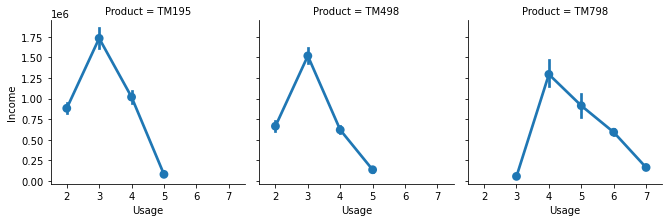

In [198]:
sns.catplot(x='Usage', y='Income', data=data,
                estimator=sum, col='Product', kind="point",
                height=3,col_wrap = 5)
#I am looking for anything significant to differeniate between customers who purchased the TM195 and those that 
#purchased the TM498.  I am not seeing much to differentiate the two, but perhaps price is the missing variable.

In [199]:
##Identify the mean of each column
Mean = data.mean()
print(Mean)

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64


In [200]:
#Identify the maximum value for each variable
data.max()

Age              50
Education        21
Usage             7
Fitness           5
Income       104581
Miles           360
dtype: int64

In [201]:
#View the correlactions statistically.  
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


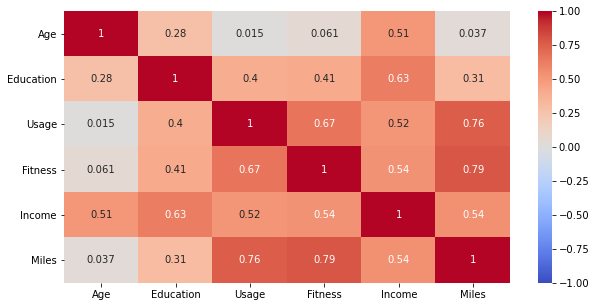

In [202]:
##Use a heatmap to visualize the correlations between the various attributes
fig,ax = plt.subplots(figsize=(10, 5))   
sns.heatmap(data.corr(), ax=ax, annot=True, cmap="coolwarm", vmin=-1, vmax=1 )
plt.show()

# Observations
I see a significant correlation between usage and miles and fitness and miles.
I see a correlation between Income and Education.
I see a positive correlation between usage and fitness level and model TM798. I also see that males are more likely to purchase TM798. Partnered individuals are purchasing more of all models.

I need to look more closely at the relationships between income, fitness, miles and usage.

<Figure size 1440x720 with 0 Axes>

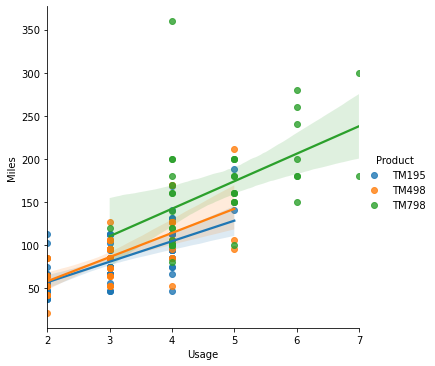

In [208]:
plt.figure(figsize=(20,10))  
sns.lmplot(x='Usage',y='Miles',data=data, hue='Product')
plt.show()

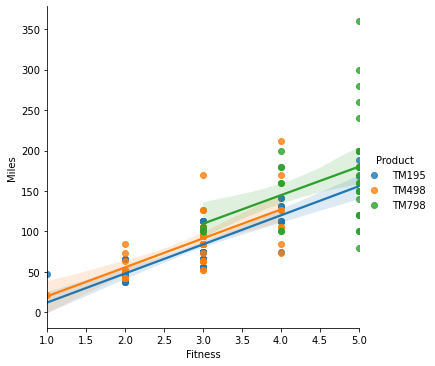

In [209]:
sns.lmplot(x='Fitness',y='Miles',data=data, hue='Product')
plt.show()

In [210]:
#Break out the averages of the numerical attributes by product
Averages=data.groupby(by = ['Product'])['Age','Miles', 'Income','Education', 'Fitness','Usage'].mean()
print(Averages)

           Age       Miles     Income  Education  Fitness     Usage
Product                                                            
TM195    28.55   82.787500  46418.025  15.037500   2.9625  3.087500
TM498    28.90   87.933333  48973.650  15.116667   2.9000  3.066667
TM798    29.10  166.900000  75441.575  17.325000   4.6250  4.775000


In [211]:
#Break out the averages by gender
data.groupby(by = ['Gender'])['Age','Miles', 'Income','Education', 'Fitness', 'Usage'].mean()

,Age,Miles,Income,Education,Fitness,Usage
Gender,,,,,,
Female,28.565789,90.013158,49828.907895,15.394737,3.026316,3.184211
Male,28.951923,112.826923,56562.759615,15.701923,3.519231,3.653846


In [212]:
#Get the % breakout by Product and Gender
data.groupby(by=['Product','Gender'])['Product'].count()/180

Product  Gender
TM195    Female    0.222222
         Male      0.222222
TM498    Female    0.161111
         Male      0.172222
TM798    Female    0.038889
         Male      0.183333
Name: Product, dtype: float64

In [214]:
#Get the % breakout by Product and Marital Status
data.groupby(by=['Product','MaritalStatus'])['Product'].count()/180

Product  MaritalStatus
TM195    Partnered        0.266667
         Single           0.177778
TM498    Partnered        0.200000
         Single           0.133333
TM798    Partnered        0.127778
         Single           0.094444
Name: Product, dtype: float64

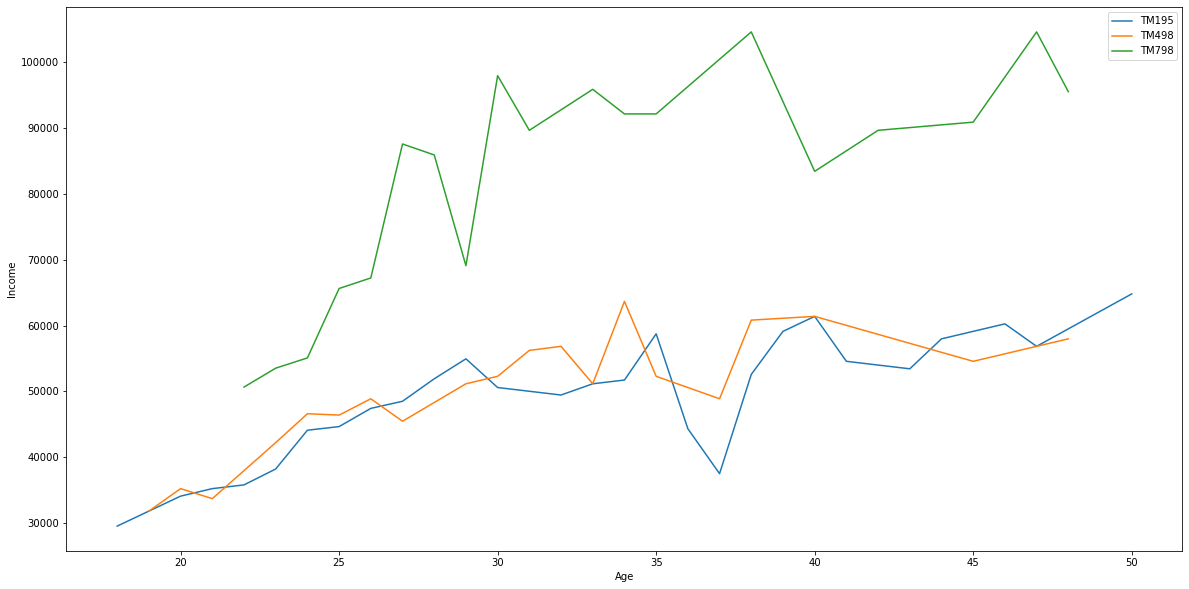

In [215]:
#Take a closer look at Age and Income relationship broken out by Product
plt.figure(figsize = (20,10)) 
sns.lineplot(x='Age', y='Income',data=data, ci=None, hue = 'Product')
plt.legend(bbox_to_anchor=(1, 1))

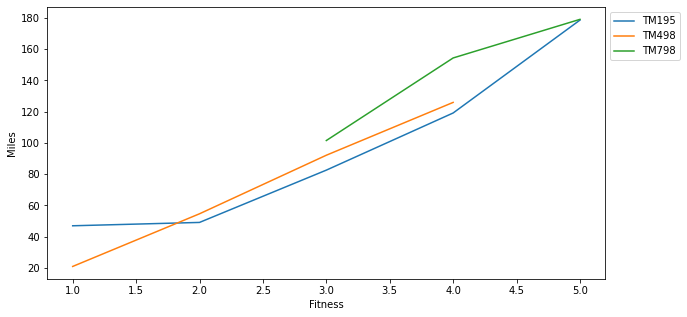

In [216]:
#Take a closer look at Fitness and Miles relationship broken out by Product
plt.figure(figsize = (10,5)) 
sns.lineplot(x='Fitness', y='Miles',data=data, ci=None, hue = 'Product')
plt.legend(bbox_to_anchor=(1, 1))

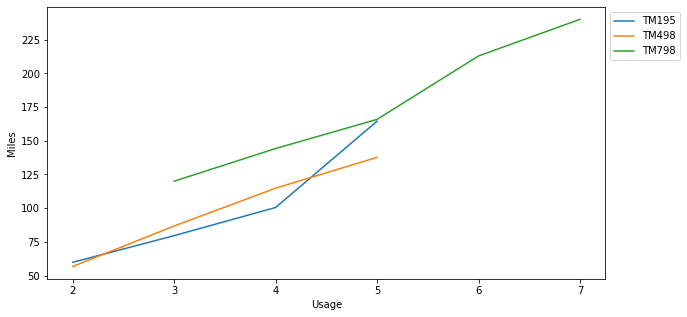

In [217]:
#Take a closer look at Usage and Miles relationship broken out by Product
plt.figure(figsize = (10,5)) 
sns.lineplot(x='Usage', y='Miles',data=data, ci=None, hue = 'Product')
plt.legend(bbox_to_anchor=(1, 1))

# Conclusion
Most customers rate themselves with an average fitness level.  The vast majority of these customers purchased either the TM195 or the TM498.

Overall, more males than females are purchasing treadmills and more partnered individuals are purchasing treadmills. 

The age range of the Good Cardio Fitness customers is between 18 and 50 years but there does not appear to be any correlation between the age of the customer and the model they purchase.

The data indicates that the average income, education, usage and fitness level increase significantly for those customers who purchased the TM798. Significantly more males than females purchased the TM798.

It is likely that pricing affects the Product selection because we see a significant increase in income level for customers who purchased the TM798.  However, we also see that fitness level and intended usage and miles have a positive correlation with income level.  

Additional analysis on pricing and product features would be beneficial to complete the customer profile.

Additionally, pricing information and an analysis of profitably by product would further inform target marketing decisions.